# SF 260 Stabilizer

In [1]:
from pint import UnitRegistry
import sympy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#import sys
%matplotlib inline
#from IPython.display import display

Import **Section** class, which contains all calculations

In [2]:
from Section import Section

Initialization of **sympy** symbolic tool and **pint** for dimension analysis (not really implemented rn as not directly compatible with sympy)

In [3]:
ureg = UnitRegistry()
sympy.init_printing()

Define **sympy** parameters used for geometric description of sections

In [4]:
Ams, Afs, Amid, Atip, tms, tfs, tpt, tpn, hms, hfs, xfs, xtip, L = \
sympy.symbols('A_ms A_fs A_mid A_tip t_ms t_fs t_pn t_pt h_ms h_fs x_sp x_tip L', positive=True)

We also define numerical values for each **symbol** in order to plot scaled section and perform calculations

In [5]:
L1 = (205.+110.)/2
tg_β = 381.8/1400.

xtip1 = -651.8 + np.arctan(tg_β)*L1/2


# altezza longheroni
hms1 = 45.
hfs1 = 50.
#pos longherone anteriore
xfs1 = -345.
# spessore pannello
tpt1 = 0.81

# punghezza pannello 1
lp1 = np.sqrt((hms1-hfs1)**2+xfs1**2)

# area pannello 1
Ap1 =lp1*tpt1

#spessore longheroni
tms1 = 3.6
tfs1 = 1.471*2

# area correnti
Astr_ms1=2.28760E+02
Astr_fs1=1.471*25.

# AREE
Ams1 = hms1*tms1/6+Ap1/4+Astr_ms1
Afs1 = hfs1*tfs1/6+Ap1/4+Astr_fs1
Amid1 = Ap1/2

In [6]:
values = [(Ams, Ams1 * ureg.millimeter**2),(Afs, Afs1  * ureg.millimeter**2), \
          (Amid, Amid1 * ureg.millimeter**2),(Atip, 0 * ureg.millimeter), \
          (tms, tms1 * ureg.millimeter),(tfs, tfs1 * ureg.millimeter), \
          (tpt, tpt1 * ureg.millimeter), (tpn, 0. * ureg.millimeter), \
          (hms, hms1 * ureg.millimeter), (hfs, hfs1 * ureg.millimeter), \
          (xfs, xfs1 * ureg.millimeter), (xtip, xtip1 * ureg.millimeter),
          (L,  L1* ureg.millimeter)]
datav = [(v[0],v[1].magnitude) for v in values]

# First section

Define graph describing the section:

1) **stringers** are **nodes** with parameters:
- **x** coordinate
- **y** coordinate
- **Area**

2) **panels** are **oriented edges** with parameters:
- **thickness**
- **lenght** which is automatically calculated

In [7]:
stringers = {1:[(sympy.Integer(0),hms),Ams],
             2:[(xfs/2,(hms+hfs)/2),Amid],
             3:[(xfs,hfs),Afs],
             4:[(xfs,-hfs),Afs],
             5:[(xfs/2,-(hms+hfs)/2),Amid],
             6:[(sympy.Integer(0),-hms),Ams]}

panels = {(1,2):tpt,
          (2,3):tpt,
          (3,4):tfs,
          (4,5):tpt,
          (5,6):tpt,
          (6,1):tms}

Define section and perform first calculations

In [8]:
S1 = Section(stringers, panels)

## Verify that we find a simply closed section

In [9]:
S1.cycles

## Plot of **S1** section in original reference frame

Define a dictionary of coordinates used by **Networkx** to plot section as a Directed graph.
Note that arrows are actually just thicker stubs

In [10]:
start_pos={ii: [float(S1.g.node[ii]['ip'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }

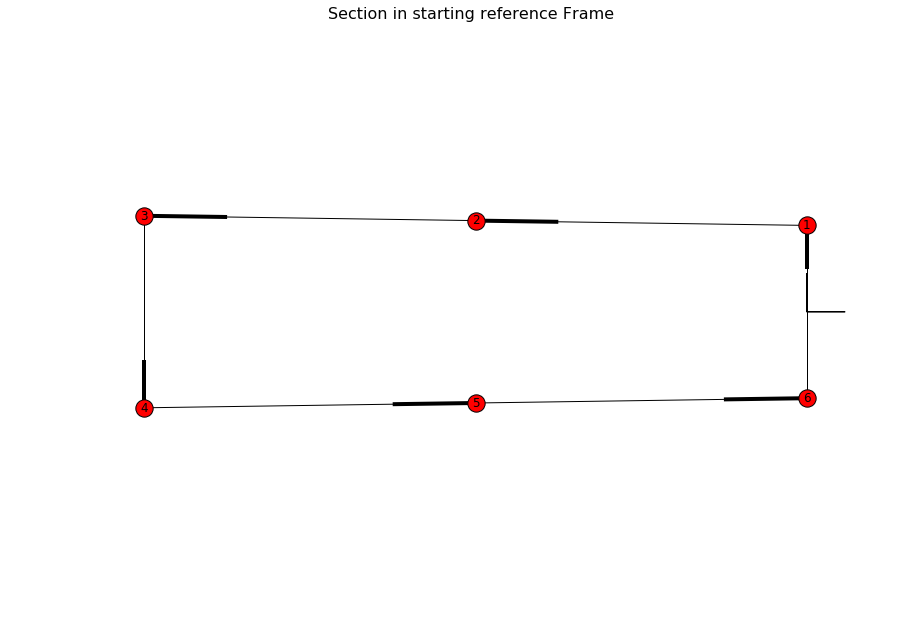

In [11]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

Expression of **Inertial properties** wrt Center of Gravity in with original rotation

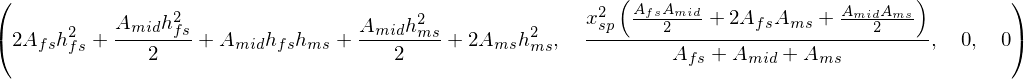

In [12]:
S1.Ixx0, S1.Iyy0, S1.Ixy0, S1.α0

## Plot of **S1** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

In [13]:
positions={ii: [float(S1.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }

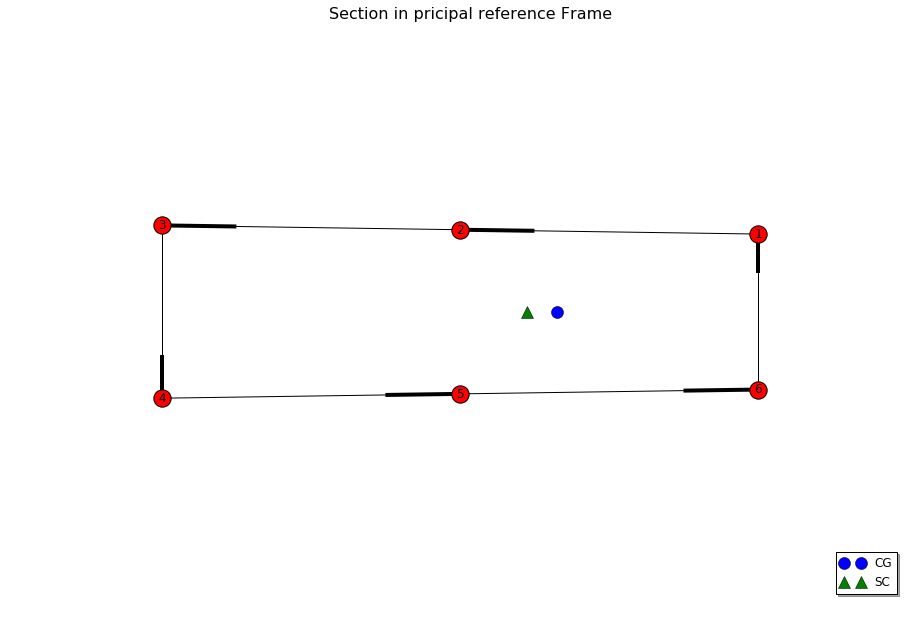

In [14]:
x_ct, y_ct = S1.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

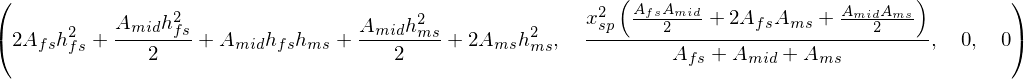

In [15]:
S1.Ixx, S1.Iyy, S1.Ixy, S1.θ

In [16]:
Ixx1 = S1.Ixx.subs(datav)

## Compute axial loads in Stringers in **S1**

We first define some symbols:

In [17]:
Tx, Ty, Nz, Mx, My, Mz, F, ry, ry, mz = sympy.symbols('T_x T_y N_z M_x M_y M_z F r_y r_x m_z')

Set **loads** on the section:

**Example 1**: _bending moment_ in **x** direction

In [18]:
S1.set_loads(_Tx=0, _Ty=0, _Nz=0, _Mx=Mx, _My=0, _Mz=0)

Compute _axial loads_ in **stringers** and _shear flows_ in **panels**

In [19]:
S1.compute_stringer_actions()
S1.compute_panel_fluxes();

## Axial loads

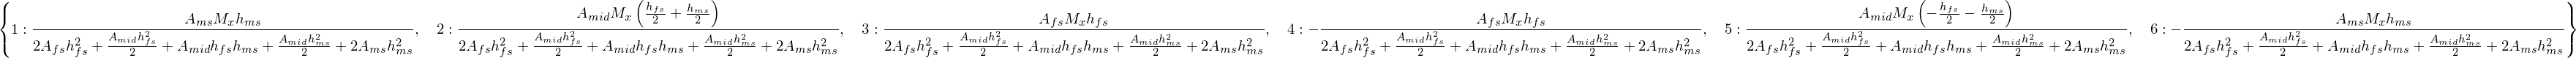

In [20]:
S1.N

## Shear flows

In [21]:
S1.q

**Example 2**: _twisting moment_ in **z** direction

In [22]:
S1.set_loads(_Tx=0, _Ty=0, _Nz=0, _Mx=0, _My=0, _Mz=Mz)
S1.compute_stringer_actions()
S1.compute_panel_fluxes();

**Axial loads**

In [23]:
S1.N

**Panel fluxes**

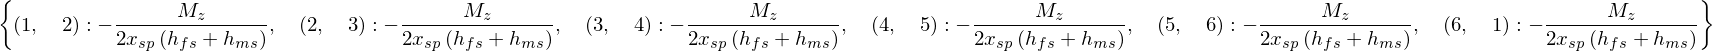

In [24]:
S1.q

## Compute **Jt**

Computation of **torsional moment of inertia**:

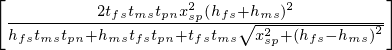

In [25]:
S1.compute_Jt()
S1.Jt

In [26]:
Jt1 = S1.Jt.subs(datav)[0]
Jt1

# Section 2

In [27]:
L2 = 410. - L1

xtip2 = -651.8 + np.arctan(tg_β)*(L1+L2/2.)


# altezza longheroni
hms2 = 42.
hfs2 = 46.
#pos longherone anteriore
xfs2 = -345.
# spessore pannello
tpt2 = 0.81
tpn2 = 0.64

# lunghezza pannelli 2
lpt2 = np.sqrt((hms2-hfs2)**2+xfs1**2)
lpn2 = np.sqrt(hfs2**2+(xfs2-xtip2)**2)

# area pannelli 2
Apt2 =lpt2*tpt2
Apn2 =lpn2*tpn2


#spessore longheroni
tms2 = 1.6
tfs2 = 1.471

# area correnti
Astr_ms2=2.28760E+02
Astr_fs2=1.471*25.

# AREE
Ams2 = hms2*tms2/6+Apt2/4+Astr_ms2
Afs2 = hfs2*tfs2/6+Apt2/4+Astr_fs2+Apn2/2
Amid2 = Apt2/2
Atip2 = Apn2

In [28]:
values = [(Ams, Ams2 * ureg.millimeter**2),(Afs, Afs2  * ureg.millimeter**2), \
          (Amid, Amid2 * ureg.millimeter**2),(Atip, Atip2 * ureg.millimeter), \
          (tms, tms2 * ureg.millimeter),(tfs, tfs2 * ureg.millimeter), \
          (tpt, tpt2 * ureg.millimeter), (tpn, tpn2 * ureg.millimeter), \
          (hms, hms2 * ureg.millimeter), (hfs, hfs2 * ureg.millimeter), \
          (xfs, xfs2 * ureg.millimeter), (xtip, xtip2 * ureg.millimeter), \
          (L,  L2* ureg.millimeter) ]
datav = [(v[0],v[1].magnitude) for v in values]

In [29]:
stringers = {1:[(sympy.Integer(0),sympy.Float(hms2)),sympy.Float(Ams2)],
             2:[(sympy.Float(xfs2/2),sympy.Float((hms2+hfs2)/2)),sympy.Float(Amid2)],
             3:[(sympy.Float(xfs2),sympy.Float(hfs2)),sympy.Float(Afs2)],
             4:[(sympy.Float(xtip2),sympy.Integer(0)),sympy.Float(Atip2)],
             5:[(sympy.Float(xfs2),sympy.Float(-hfs2)),sympy.Float(Afs2)],
             6:[(sympy.Float(xfs2/2),sympy.Float(-(hms2+hfs2)/2)),sympy.Float(Amid2)],
             7:[(sympy.Integer(0),sympy.Float(-hms2)),sympy.Float(Ams2)]}

panels = {(1,2):sympy.Float(tpt2),
          (2,3):sympy.Float(tpt2),
          (3,4):sympy.Float(tpn2),
          (4,5):sympy.Float(tpn2),
          (5,6):sympy.Float(tpt2),
          (6,7):sympy.Float(tpt2),
          (3,5):sympy.Float(tfs2),
          (7,1):sympy.Float(tms2)}

stringers = {1:[(sympy.Integer(0),hms),Ams],
             2:[(xfs/2,(hms+hfs)/2),Amid],
             3:[(xfs,hfs),Afs],
             4:[(xtip,sympy.Integer(0)),Atip],
             5:[(xfs,-hfs2),Afs],
             6:[(xfs/2,-(hms+hfs)/2),Amid],
             7:[(sympy.Integer(0),-hms),Ams]}

panels = {(1,2):tpt,
          (2,3):tpt,
          (3,4):tpn,
          (4,5):tpn,
          (5,6):tpt,
          (6,7):tpt,
          (3,5):tfs,
          (7,1):tms}

Define section and perform first calculations

In [30]:
S2 = Section(stringers, panels)

In [31]:
S2.cycles

## Plot of **S2** section in original reference frame

Define a dictionary of coordinates used by **Networkx** to plot section as a Directed graph.
Note that arrows are actually just thicker stubs

In [32]:
start_pos={ii: [float(S2.g.node[ii]['ip'][i].subs(datav)) for i in range(2)] for ii in S2.g.nodes() }

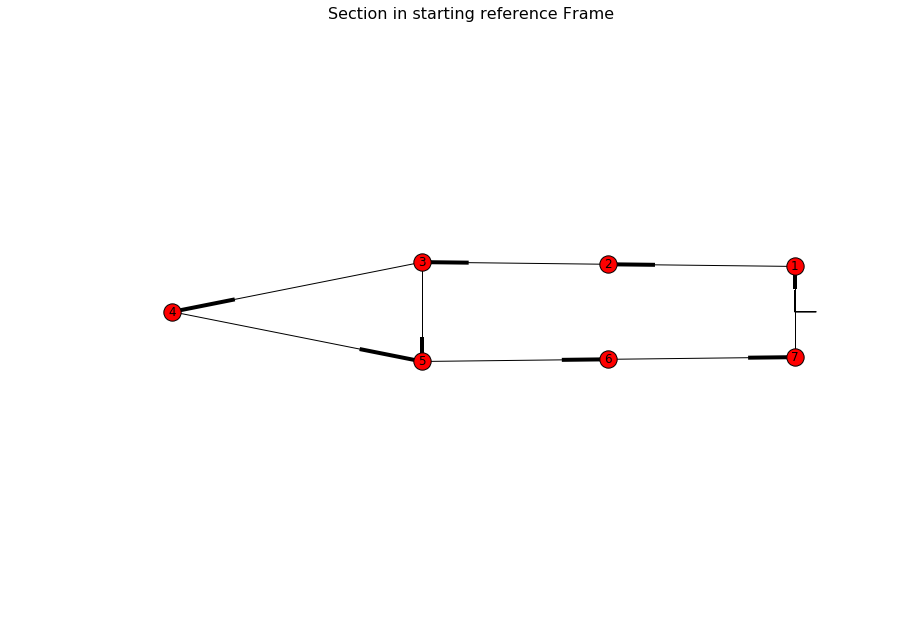

In [33]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S2.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

Expression of **Inertial properties** wrt Center of Gravity in with original rotation

In [34]:
S2.Ixx0, S2.Iyy0, S2.Ixy0, S2.α0

## Plot of **S2** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

In [35]:
positions={ii: [float(S2.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S2.g.nodes() }

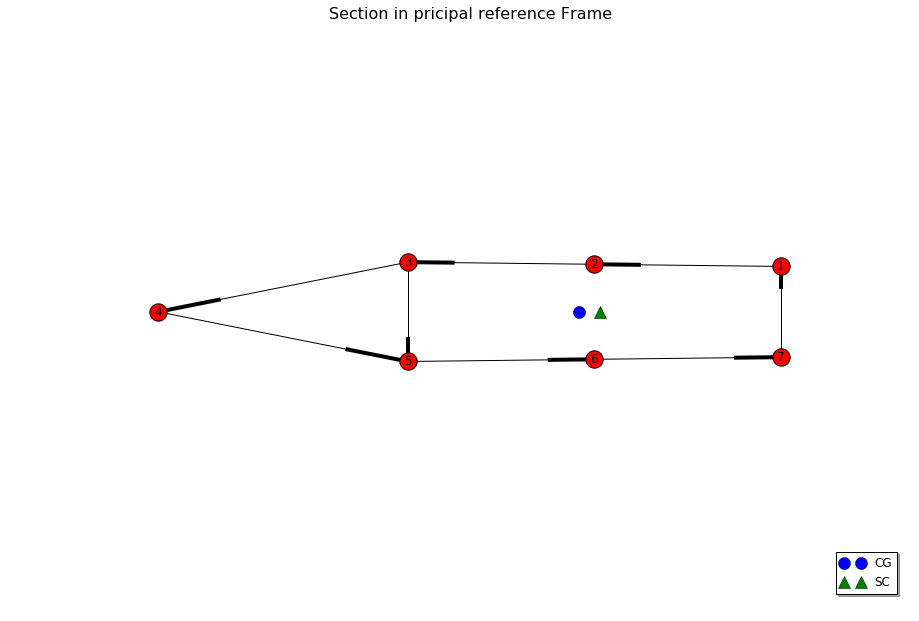

In [36]:
x_ct, y_ct = S2.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S2.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

In [37]:
S2.Ixx, S2.Iyy, S2.Ixy, S2.θ

In [38]:
Ixx2 = S2.Ixx.subs(datav)

In [39]:
S2.set_loads(_Tx=0, _Ty=0, _Nz=0, _Mx=0, _My=0, _Mz=0)

In [40]:
S2.compute_Jt()
S2.Jt

In [41]:
Jt2 = S2.Jt[0]
Jt2

# Section 3

In [42]:
L3 = 330.

xtip3 = -651.8 + np.arctan(tg_β)*(410.+L3/2.)


# altezza longheroni
hms3 = 38.1
hfs3 = 37.4
#pos longherone anteriore
xfs3 = -345.
# spessore pannello
tpt3 = 0.81
tpn3 = 0.64

# lunghezza pannelli 2
lpt3 = np.sqrt((hms3-hfs3)**2+xfs3**2)
lpn3 = np.sqrt(hfs3**2+(xfs3-xtip3)**2)

# area pannelli 2
Apt3 =lpt3*tpt3
Apn3 =lpn3*tpn3


#spessore longheroni
tms3 = 1.6
tfs3 = 1.471

# area correnti
Astr_ms3=1.17760E+02
Astr_fs3=1.471*25.

# AREE
Ams3 = hms3*tms3/6+Apt3/4+Astr_ms3
Afs3 = hfs3*tfs3/6+Apt3/4+Astr_fs3+Apn3/2
Amid3 = Apt3/2
Atip3 = Apn3

In [43]:
values = [(Ams, Ams3 * ureg.millimeter**2),(Afs, Afs3  * ureg.millimeter**2), \
          (Amid, Amid3 * ureg.millimeter**2),(Atip, Atip3 * ureg.millimeter), \
          (tms, tms3 * ureg.millimeter),(tfs, tfs3 * ureg.millimeter), \
          (tpt, tpt3 * ureg.millimeter), (tpn, tpn3 * ureg.millimeter), \
          (hms, hms3 * ureg.millimeter), (hfs, hfs3 * ureg.millimeter), \
          (xfs, xfs3 * ureg.millimeter), (xtip, xtip3 * ureg.millimeter), \
          (L,  L3* ureg.millimeter) ]
datav = [(v[0],v[1].magnitude) for v in values]

In [44]:
stringers = {1:[(sympy.Integer(0),sympy.Float(hms3)),sympy.Float(Ams3)],
             2:[(sympy.Float(xfs3/2),sympy.Float((hms3+hfs3)/2)),sympy.Float(Amid3)],
             3:[(sympy.Float(xfs3),sympy.Float(hfs3)),sympy.Float(Afs3)],
             4:[(sympy.Float(xtip3),sympy.Integer(0)),sympy.Float(Atip3)],
             5:[(sympy.Float(xfs3),sympy.Float(-hfs3)),sympy.Float(Afs3)],
             6:[(sympy.Float(xfs3/2),sympy.Float(-(hms3+hfs3)/2)),sympy.Float(Amid3)],
             7:[(sympy.Integer(0),sympy.Float(-hms3)),sympy.Float(Ams3)]}

panels = {(1,2):sympy.Float(tpt3),
          (2,3):sympy.Float(tpt3),
          (3,4):sympy.Float(tpn3),
          (4,5):sympy.Float(tpn3),
          (5,6):sympy.Float(tpt3),
          (6,7):sympy.Float(tpt3),
          (3,5):sympy.Float(tfs3),
          (7,1):sympy.Float(tms3)}

Define section and perform first calculations

In [45]:
S3 = Section(stringers, panels)

In [46]:
S3.cycles

## Plot of **S3** section in original reference frame

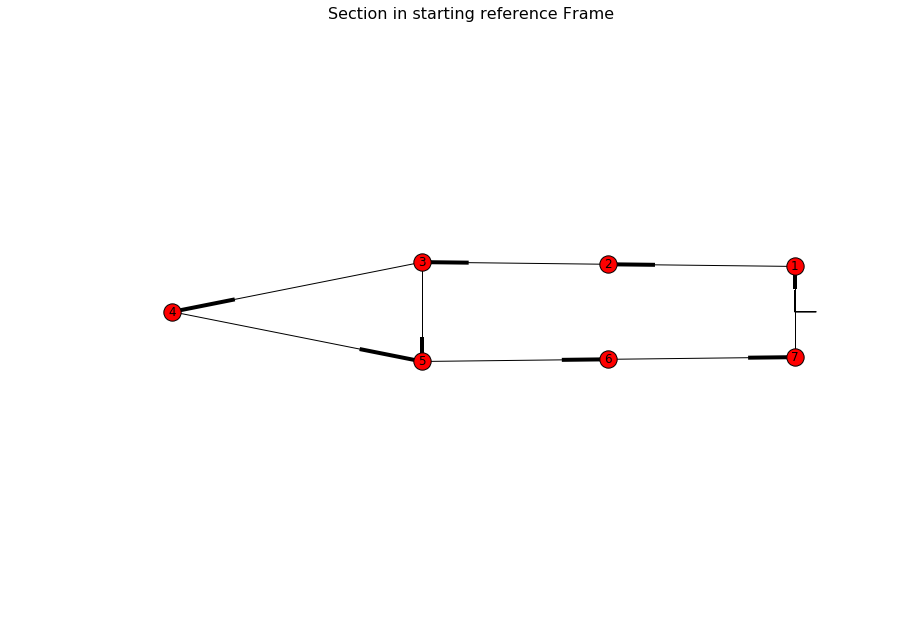

In [47]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S3.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

Expression of **Inertial properties** wrt Center of Gravity in with original rotation

In [48]:
S3.Ixx0, S3.Iyy0, S3.Ixy0, S3.α0

## Plot of **S3** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

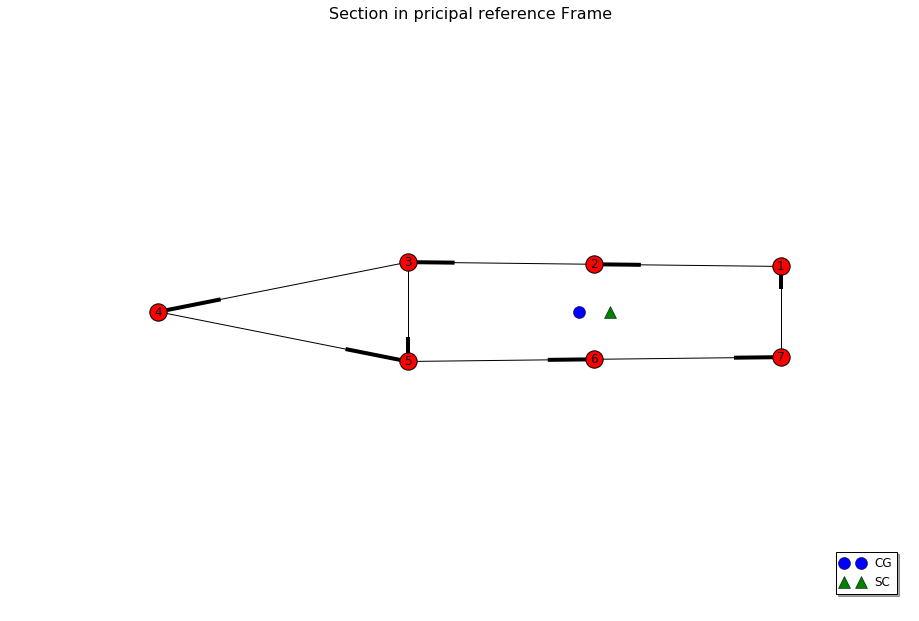

In [49]:
x_ct, y_ct = S3.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S3.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

In [50]:
S3.Ixx, S3.Iyy, S3.Ixy, S3.θ

In [51]:
Ixx3 = S3.Ixx.subs(datav)

In [52]:
S3.set_loads(_Tx=0, _Ty=0, _Nz=0, _Mx=0, _My=0, _Mz=0)

In [53]:
S3.compute_Jt()
S3.Jt

In [54]:
Jt3 = S3.Jt[0]

# Section 4

In [80]:
L4 = 330.

xtip4 = -651.8 + np.arctan(tg_β)*(740.+L4/2.)


# altezza longheroni
hms4 = 32.25
hfs4 = 25.4
#pos longherone anteriore
xfs4 = -345.+ np.arctan(tg_β)*(L4/2.)
# spessore pannello
tpt4 = 0.81
tpn4 = 0.64

# lunghezza pannelli 2
lpt4 = np.sqrt((hms4-hfs4)**2+xfs4**2)
lpn4 = np.sqrt(hfs4**2+(xfs4-xtip4)**2)

# area pannelli 2
Apt4 =lpt4*tpt4
Apn4 =lpn4*tpn4


#spessore longheroni
tms4 = 1.6
tfs4 = 0.

# area correnti
Astr_ms4=2.28760E+02
Astr_fs4=7.74400E+01

# AREE
Ams4 = hms4*tms4/6+Apt4/4+Astr_ms4
Afs4 = hfs4*tfs4/6+Apt4/4+Astr_fs4+Apn4/2
Amid4 = Apt4/2
Atip4 = Apn4

In [81]:
values = [(Ams, Ams4 * ureg.millimeter**2),(Afs, Afs4  * ureg.millimeter**2), \
          (Amid, Amid4 * ureg.millimeter**2),(Atip, Atip4 * ureg.millimeter), \
          (tms, tms4 * ureg.millimeter),(tfs, tfs4 * ureg.millimeter), \
          (tpt, tpt4 * ureg.millimeter), (tpn, tpn4 * ureg.millimeter), \
          (hms, hms4 * ureg.millimeter), (hfs, hfs4 * ureg.millimeter), \
          (xfs, xfs4 * ureg.millimeter), (xtip, xtip4 * ureg.millimeter), \
          (L,  L4* ureg.millimeter) ]
datav = [(v[0],v[1].magnitude) for v in values]

In [82]:
stringers = {1:[(sympy.Integer(0),sympy.Float(hms4)),sympy.Float(Ams4)],
             2:[(sympy.Float(xfs4/2),sympy.Float((hms4+hfs4)/2)),sympy.Float(Amid4)],
             3:[(sympy.Float(xfs4),sympy.Float(hfs4)),sympy.Float(Afs4)],
             4:[(sympy.Float(xtip4),sympy.Integer(0)),sympy.Float(Atip4)],
             5:[(sympy.Float(xfs4),sympy.Float(-hfs4)),sympy.Float(Afs4)],
             6:[(sympy.Float(xfs4/2),sympy.Float(-(hms4+hfs4)/2)),sympy.Float(Amid4)],
             7:[(sympy.Integer(0),sympy.Float(-hms4)),sympy.Float(Ams4)]}

panels = {(1,2):sympy.Float(tpt4),
          (2,3):sympy.Float(tpt4),
          (3,4):sympy.Float(tpn4),
          (4,5):sympy.Float(tpn4),
          (5,6):sympy.Float(tpt4),
          (6,7):sympy.Float(tpt4),
          (7,1):sympy.Float(tms4)}

Define section and perform first calculations

In [83]:
S4 = Section(stringers, panels)

In [84]:
S4.cycles

## Plot of **S4** section in original reference frame

In [85]:
positions={ii: [float(S4.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S4.g.nodes() }

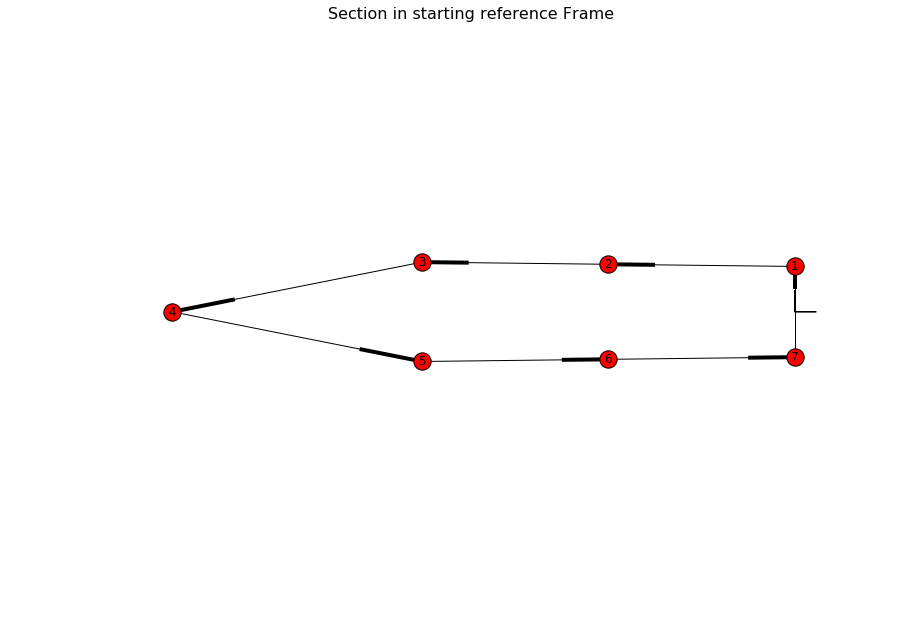

In [86]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S4.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

Expression of **Inertial properties** wrt Center of Gravity in with original rotation

In [87]:
S4.Ixx0, S4.Iyy0, S4.Ixy0, S4.α0

## Plot of **S4** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

In [88]:
positions={ii: [float(S4.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S4.g.nodes() }

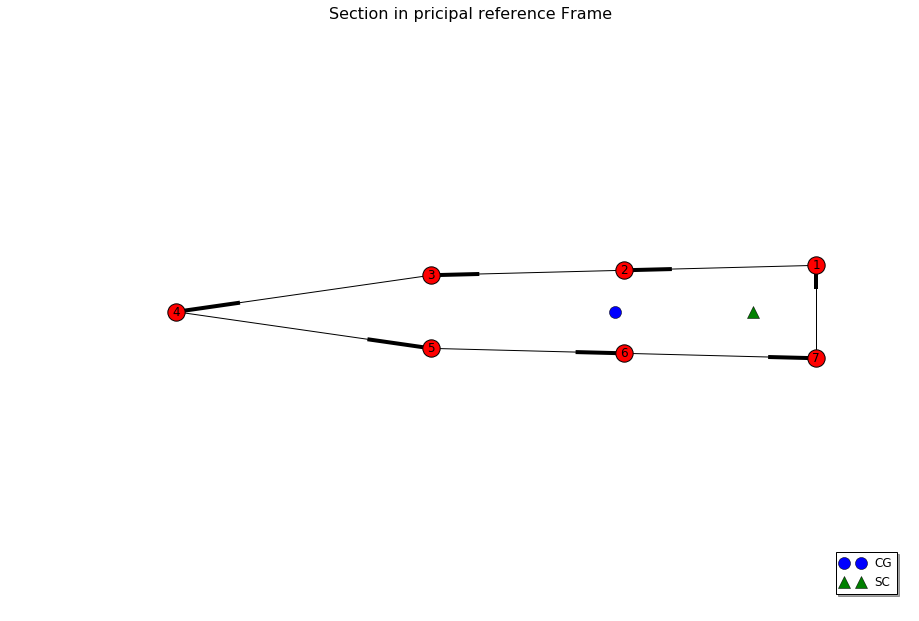

In [89]:
x_ct, y_ct = S4.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S4.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

In [90]:
S4.Ixx, S4.Iyy, S4.Ixy, S4.θ

In [91]:
Ixx4 = S4.Ixx.subs(datav)

In [92]:
S4.set_loads(_Tx=0, _Ty=0, _Nz=0, _Mx=0, _My=0, _Mz=0)

In [93]:
S4.compute_Jt()
S4.Jt

In [94]:
Jt4 = S4.Jt[0]
Jt4

# Section 5

In [115]:
L5 = 330.

xtip5 = -651.8 + np.arctan(tg_β)*(1070.+L5/2.)


# altezza longheroni
hms5 = 25.5
hfs5 = 22.
#pos longherone anteriore
xfs5 = -345.+ np.arctan(tg_β)*(L4+L5/2.)
# spessore pannello
tpt5 = 0.81
tpn5 = 0.64

# lunghezza pannelli 2
lpt5 = np.sqrt((hms5-hfs5)**2+xfs5**2)
lpn5 = np.sqrt(hfs5**2+(xfs5-xtip5)**2)

# area pannelli 2
Apt5 =lpt5*tpt5
Apn5 =lpn5*tpn5


#spessore longheroni
tms5 = 1.6+2.9
tfs5 = 0.

# area correnti
Astr_ms5=1.90260E+02
Astr_fs5=7.74400E+01

# AREE
Ams5 = hms5*tms5/6+Apt5/4+Astr_ms5
Afs5 = hfs5*tfs4/6+Apt5/4+Astr_fs5+Apn5/2
Amid5 = Apt5/2
Atip5 = Apn5

In [116]:
values = [(Ams, Ams5 * ureg.millimeter**2),(Afs, Afs5  * ureg.millimeter**2), \
          (Amid, Amid5 * ureg.millimeter**2),(Atip, Atip5 * ureg.millimeter), \
          (tms, tms5 * ureg.millimeter),(tfs, tfs5 * ureg.millimeter), \
          (tpt, tpt5 * ureg.millimeter), (tpn, tpn5 * ureg.millimeter), \
          (hms, hms5 * ureg.millimeter), (hfs, hfs5 * ureg.millimeter), \
          (xfs, xfs5 * ureg.millimeter), (xtip, xtip5 * ureg.millimeter), \
          (L,  L5* ureg.millimeter) ]
datav = [(v[0],v[1].magnitude) for v in values]

In [117]:
stringers = {1:[(sympy.Integer(0),sympy.Float(hms5)),sympy.Float(Ams5)],
             2:[(sympy.Float(xfs5/2),sympy.Float((hms5+hfs5)/2)),sympy.Float(Amid5)],
             3:[(sympy.Float(xfs5),sympy.Float(hfs5)),sympy.Float(Afs5)],
             4:[(sympy.Float(xtip5),sympy.Integer(0)),sympy.Float(Atip5)],
             5:[(sympy.Float(xfs5),sympy.Float(-hfs5)),sympy.Float(Afs5)],
             6:[(sympy.Float(xfs5/2),sympy.Float(-(hms5+hfs5)/2)),sympy.Float(Amid5)],
             7:[(sympy.Integer(0),sympy.Float(-hms5)),sympy.Float(Ams5)]}

panels = {(1,2):sympy.Float(tpt5),
          (2,3):sympy.Float(tpt5),
          (3,4):sympy.Float(tpn5),
          (4,5):sympy.Float(tpn5),
          (5,6):sympy.Float(tpt5),
          (6,7):sympy.Float(tpt5),
          (7,1):sympy.Float(tms5)}

Define section and perform first calculations

In [118]:
S5 = Section(stringers, panels)

In [119]:
S5.cycles

## Plot of **S5** section in original reference frame

In [120]:
positions={ii: [float(S5.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S5.g.nodes() }

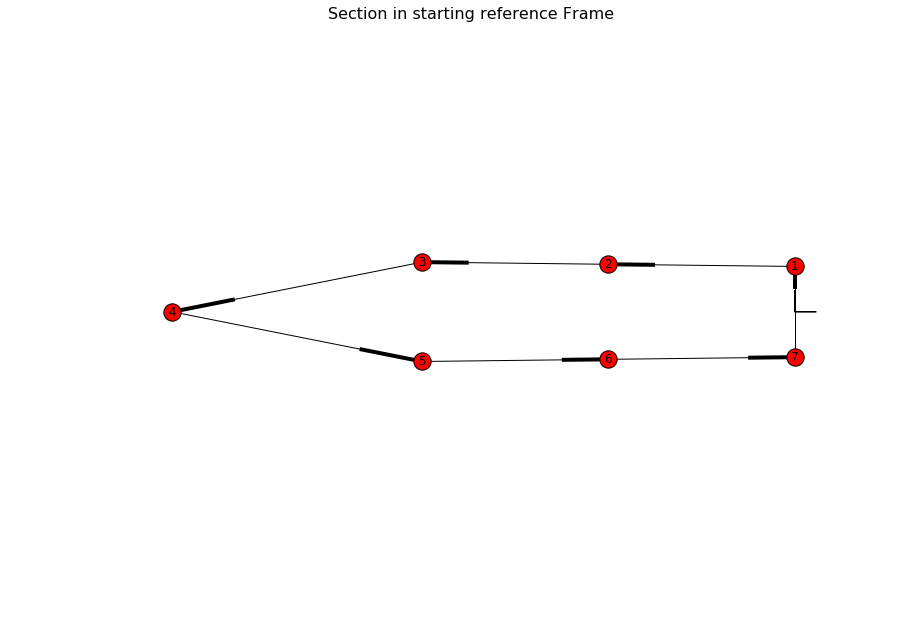

In [121]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S5.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

Expression of **Inertial properties** wrt Center of Gravity in with original rotation

In [122]:
S5.Ixx0, S5.Iyy0, S5.Ixy0, S4.α0

## Plot of **S5** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

In [123]:
positions={ii: [float(S5.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S5.g.nodes() }

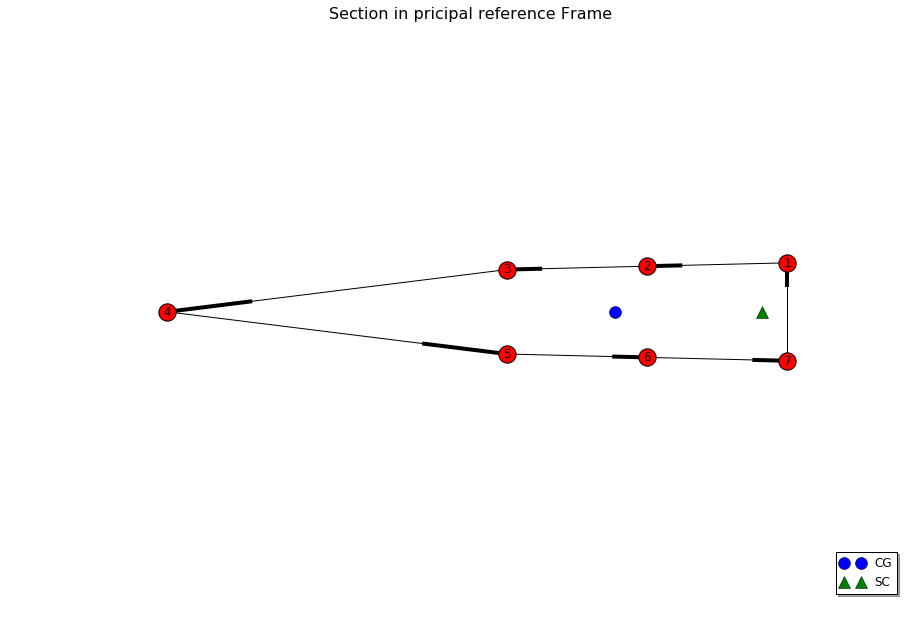

In [124]:
x_ct, y_ct = S5.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S4.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

In [125]:
S5.Ixx, S5.Iyy, S5.Ixy, S5.θ

In [126]:
Ixx5 = S5.Ixx.subs(datav)

In [127]:
S5.set_loads(_Tx=0, _Ty=0, _Nz=0, _Mx=0, _My=0, _Mz=0)

In [129]:
S5.compute_Jt()
S5.Jt

In [130]:
Jt5 = S5.Jt[0]
Jt5

In [131]:
E = 73100.
ν = .33
G = E/(2*(1+ν))

# Compute torsion angle

In [132]:
Mz = 1000.

In [133]:
ϕ = Mz/G*(L1/Jt1+L2/Jt2+L3/Jt3+L4/Jt4+L5/Jt5)

## overall torsion angle

In [134]:
ϕ

# Compute tip displacement and rotation

In [136]:
L = np.array([L1, L2, L3, L4, L5])
Mx = 1000.
Jxx = np.array([Ixx1, Ixx2, Ixx3, Ixx4, Ixx5])

In [143]:
θ = Mx*L/(E*Jxx)
sum(θ)

In [148]:
y = -Mx*L**2/(2*E*Jxx)
yf = sum([-L[i]*sum(θ[:i-1]) for i in range(1,len(L))]) + sum(y)
yf